In [72]:
#  ANN 人工神经网络(Artificial Neural Network，ANN)
'''载入数据'''
# 下面这个被开发者舍弃了已经
# from sklearn import datasets
# boston = datasets.load_boston()
# x,y = boston.data,boston.target

import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
x,y=data,target

'''引入标准化函数'''
from sklearn import preprocessing
# 将数据的每一个特征缩放到给定的范围
x_MinMax = preprocessing.MinMaxScaler()
y_MinMax = preprocessing.MinMaxScaler()

''' 将 y 转换成 列 '''
import numpy as np
# len(y)是行，1是列
y = np.array(y).reshape(len(y),1)
'''标准化'''
x = x_MinMax.fit_transform(x)
y = y_MinMax.fit_transform(y)

''' 按二八原则划分训练集和测试集 '''
from sklearn.model_selection import train_test_split
np.random.seed(2019)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

'''模型构建'''
from sklearn.neural_network import MLPRegressor
fit1 = MLPRegressor(
    hidden_layer_sizes=(100,50), activation='relu',solver='adam',
# '''第一个隐藏层有100个节点，第二层有50个，激活函数用relu，梯度下降方法用adam'''
alpha=0.01,max_iter=200)
# '''惩罚系数为0.01，最大迭代次数为200'''
print ("fitting model right now")
# .ravel()可以把列向量转化为一个一维数组
fit1.fit(x_train,y_train.ravel())
pred1_train = fit1.predict(x_train)

fitting model right now


In [73]:
'''计算训练集 MSE'''
from sklearn.metrics import mean_squared_error
mse_1 = mean_squared_error(pred1_train,y_train)
print ("Train ERROR = ", mse_1)
'''计算测试集mse'''
pred1_test = fit1.predict(x_test)
mse_2 = mean_squared_error(pred1_test,y_test)
print ("Test ERROR = ", mse_2)

Train ERROR =  0.00733273144550684
Test ERROR =  0.009604936442639024


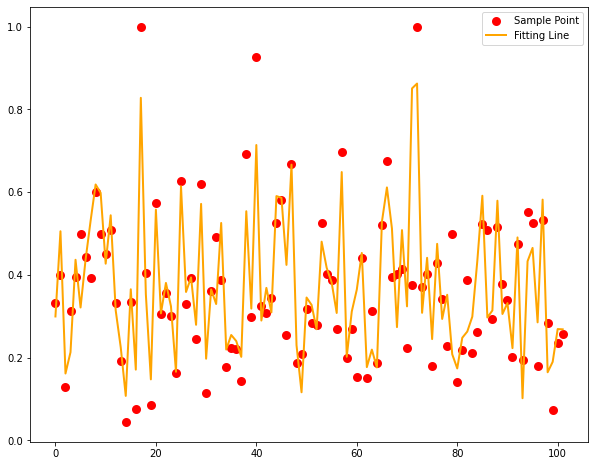

In [79]:
'''结果可视化'''
import matplotlib.pyplot as plt
xx=range(0,len(y_test))
# figsize 设置显示的长，宽
plt.figure(figsize=(10,8))
plt.scatter(xx,y_test,color="red",label="Sample Point",linewidth=3)
plt.plot(xx,pred1_test,color="orange",label="Fitting Line",linewidth=2)
plt.legend()
plt.show()

In [75]:
# 计算预测的分数
from sklearn.metrics import explained_variance_score
score=explained_variance_score(pred1_test,y_test)
print('evs: %.2f%%'%(score*100.0))

evs: 65.24%


In [81]:
from sklearn.metrics import r2_score
score=r2_score(pred1_test, y_test)
print("拟合程度分数：",score)

拟合程度分数： 0.6499534939931895


In [71]:
x_train

array([[2.07272394e-03, 2.20000000e-01, 1.97947214e-01, ...,
        6.91489362e-01, 9.92031873e-01, 1.33278146e-01],
       [4.16433067e-04, 2.10000000e-01, 1.89882698e-01, ...,
        4.46808511e-01, 9.92611831e-01, 2.12472406e-01],
       [1.67472408e-02, 0.00000000e+00, 7.00879765e-01, ...,
        2.23404255e-01, 8.60557769e-01, 3.18708609e-01],
       ...,
       [1.59458459e-02, 0.00000000e+00, 7.00879765e-01, ...,
        2.23404255e-01, 9.17822381e-01, 1.56181015e-01],
       [7.34230506e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 9.87770437e-01, 3.39403974e-02],
       [9.58976229e-04, 0.00000000e+00, 3.79398827e-01, ...,
        7.02127660e-01, 9.84895860e-01, 1.04580574e-01]])